In [1]:
using DelimitedFiles
using Plots
using Statistics
using LinearAlgebra
using Interpolations
using DataFrames
using FFTW
ENV["COLUMNS"] = 1000
ENV["LINES"] = 1000

1000

In [79]:
# plotly()
 pyplot()

Plots.PyPlotBackend()

In [265]:
# fileName = "Exp03/AVG-by-100_CACOnUV-100_DACOnBL-28_SN2_COM5_08.06.2020.LOG"
# name = "Exp01/COM18_N-AVG-1_SN6.LOG"
# workTimeInd = 1:length(data[:,1]);
# workChanInd = [1;9:12];
# data = readdlm(fileName,' ',skipstart=1)


# time = data[:, workChanInd[1]];
# spec = data[:, workChanInd[2:end]];

# # Number of points 
# N = length(time) .- 1;
# # Sample period
# Ts = time[20] -time[19]


# F = hcat([fft(spec[:,i]) for  i = 1:size(spec,2)]...)


# freqs = fftfreq(length(time), 1.0/Ts) 

# freq_domain = plot(freqs, abs.(F), title = "Spectrum", xlim=(0, +200)) 


# plot(freqs[20:20000],abs.(F[20:20000,1:2]), title = "FFT спектр",xlabel = "\$ \\nu \$, Гц", ylabel = "Амплитуда, отсчетов. АЦП")
# size(F)
# plt = plot(spec[:,:],title = "AVG-by-1_DACOnUV-50_SN2_COM5_22.05.2020.LOG",xlabel="Номер измерения",ylabel = "Напряжение, код АЦП" )

# savefig(plt , name*".png")
# plt

In [237]:
function plotFFTSpectrum(time,spec)
    N = length(time) .- 1;
# Sample period
    Ts = time[20] -time[19]
    F = hcat([fft(spec[:,i]) for  i = 1:size(spec,2)]...)
    freqs = fftfreq(length(time), 1.0/Ts) 
    plts = [plot(freqs[20:Int64(floor(N/2))],abs.(F[20:Int64(floor(N/2)),i]), title = "Канал " * string(i) ,
            xlabel = "\$ \\nu \$, Гц", 
            ylabel = "Амплитуда, отсчетов. АЦП",
            label = "") for i = 1:size(spec,2),
            tickfontsize = 6,
            labelfontsize = 8] 
    
    plt = plot(plts...,layout = grid(4, 1),size = [1200,800],labelfontsize=8)
  
end

plotFFTSpectrum (generic function with 1 method)

In [126]:
function getStatData(fileName,workChanInd,workTimeInd)
    data = readdlm(fileName,' ',skipstart=1)
    time = data[workTimeInd, workChanInd[1]]
    spec = data[workTimeInd, workChanInd[2:end]]
    
    output = DataFrame();
    MInd = Symbol("\$\\bar{U}\$")
    StdInd = Symbol("\$\\sigma_{U}\$")
    ErrInd = Symbol("\$Err_{U}\$")
    SNRInd = Symbol("\$SNR_{U}\$")
    output[!,MInd] = [mean(spec[:,i]) for i = 1:size(spec,2)]
    output[!,StdInd] = [std(spec[:,i]) for i = 1:size(spec,2)]
    output[!,ErrInd] = 3 .*output[:,StdInd]
    output[!,SNRInd] = output[!,MInd]./output[!,ErrInd]
    plt = plotFFTSpectrum(time,spec)
    output, plt
end

getStatData (generic function with 1 method)

getStatData (generic function with 1 method)

# Плата №6 
Исходный коэффециент усиления, усреднение по 1 точке
файл COM18_N-AVG-1_SN6.LOG

In [238]:
S6_1_10 , plt = getStatData("Exp01/COM18_N-AVG-1_SN6.LOG",workChanInd,20000:40000)
S6_1_10

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,37467.1,61.288,183.864,203.776
2,41122.3,69.1582,207.475,198.204
3,48933.9,99.0102,297.031,164.744
4,42966.6,72.4126,217.238,197.786


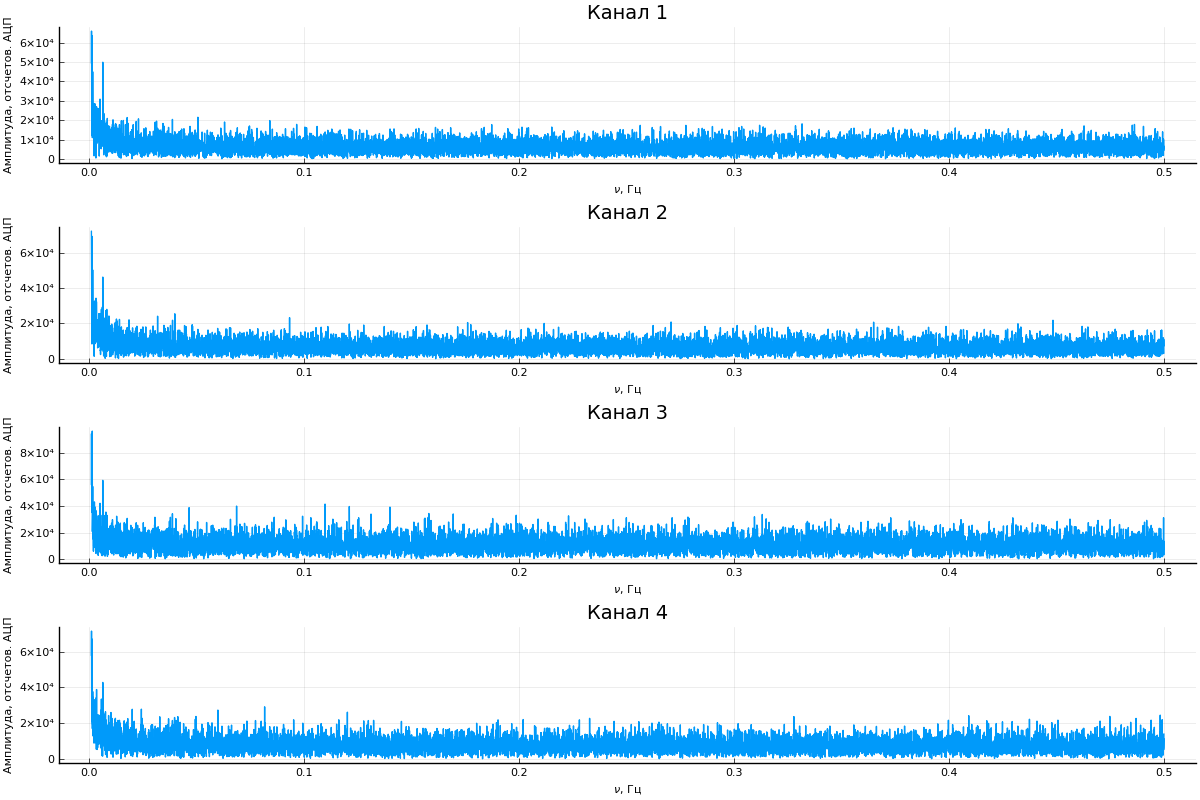

In [239]:
plt

# Плата №6 
Исходный коэффециент усиления, усреднение по 100 точкам
файл COM18_N-AVG-100_SN6.LOG

In [241]:
S6_100_10 , plt = getStatData("Exp01/COM18_N-AVG-100_SN6.LOG",workChanInd,20000:40000)
S6_100_10

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,37327.8,30.7143,92.1429,405.108
2,41263.1,37.8377,113.513,363.51
3,49062.6,43.1611,129.483,378.91
4,43069.2,34.9271,104.781,411.04


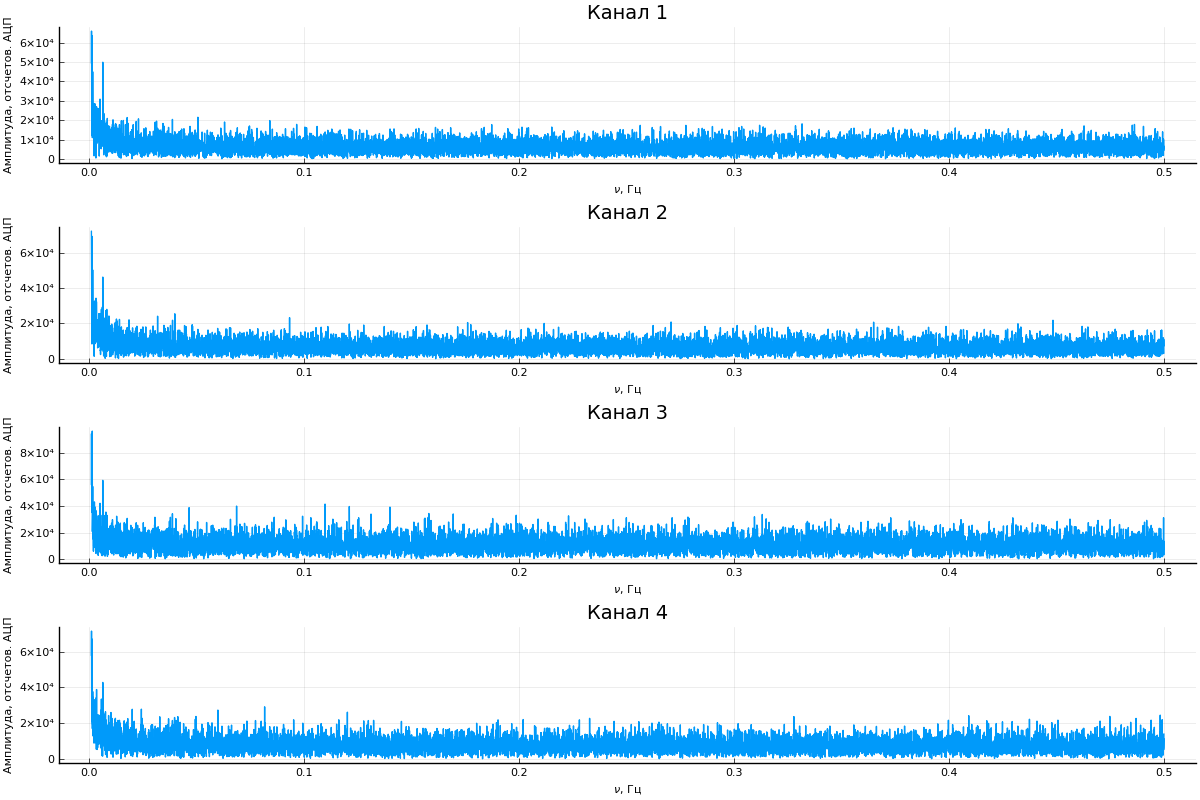

In [240]:
plt

# Плата №4 
Исходный коэффециент усиления, усреднение по 1 точке
файл COM19_N-AVG-1_SN4.LOG

In [242]:
S4_1_10,plt = getStatData("Exp01/COM19_N-AVG-1_SN4.LOG",workChanInd,20000:40000)
S4_1_10

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,27262.2,212.34,637.021,42.7964
2,46522.9,391.812,1175.44,39.5793
3,33385.7,280.754,842.262,39.6381
4,24892.4,190.354,571.062,43.5896


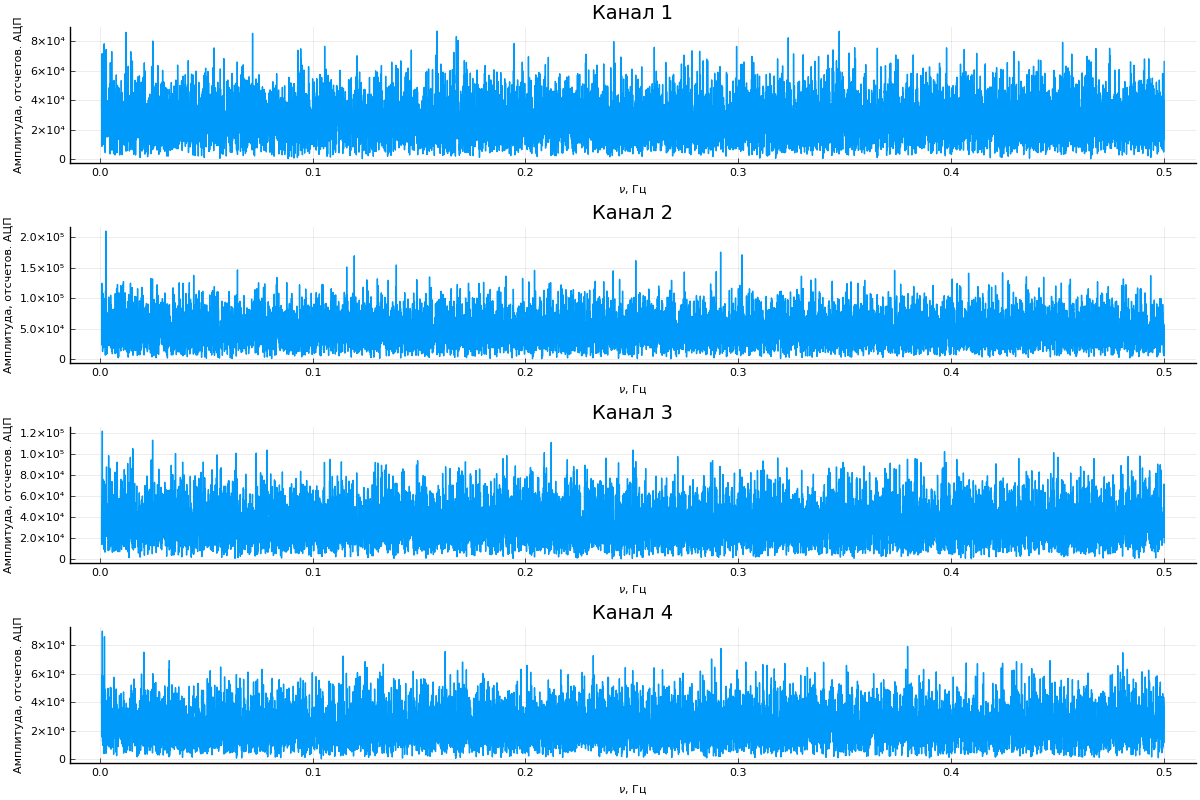

In [243]:
plt

# Плата №4 
Исходный коэффециент усиления, усреднение по 100 точкам
файл COM19_N-AVG-100_SN4.LOG

In [244]:
S4_100_10, plt = getStatData("Exp01/COM19_N-AVG-100_SN4.LOG",workChanInd,20000:40000)
S4_100_10

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,26413.1,37.6375,112.912,233.926
2,46563.1,77.2656,231.797,200.879
3,33403.9,58.0184,174.055,191.916
4,24924.0,40.1129,120.339,207.116


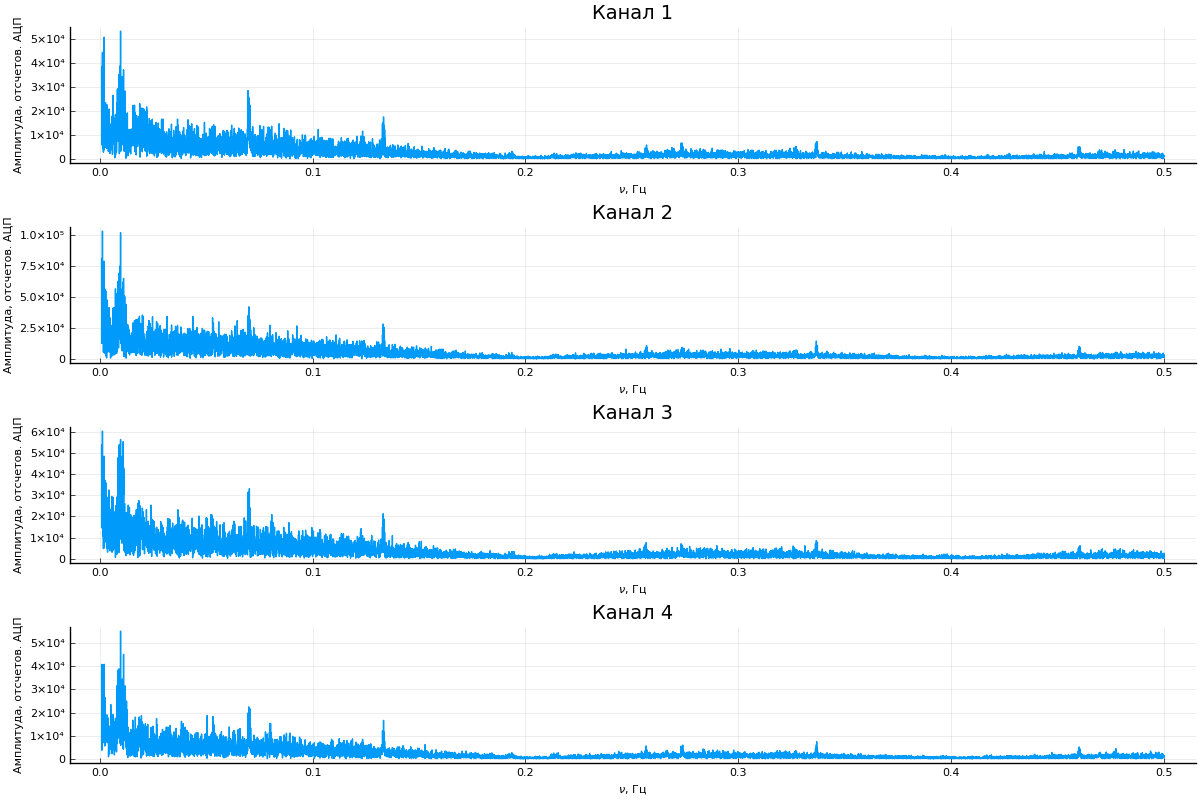

In [246]:
plt

# Плата №6 
Исходный коэффециент усиления уменьшен в 2 раза, усреднение по 1 точке
файл AVG-by-1_DACOnUV-40_SN2_COM5_25.05.2020.LOG

In [247]:
S6_1_5, plt = getStatData("Exp02/AVG-by-1_DACOnUV-40_SN2_COM5_25.05.2020.LOG",workChanInd,20000:40000)
S6_1_5

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,45088.9,50.2322,150.697,299.203
2,45567.8,375.396,1126.19,40.462
3,53457.9,387.21,1161.63,46.0197
4,53401.4,384.379,1153.14,46.3097


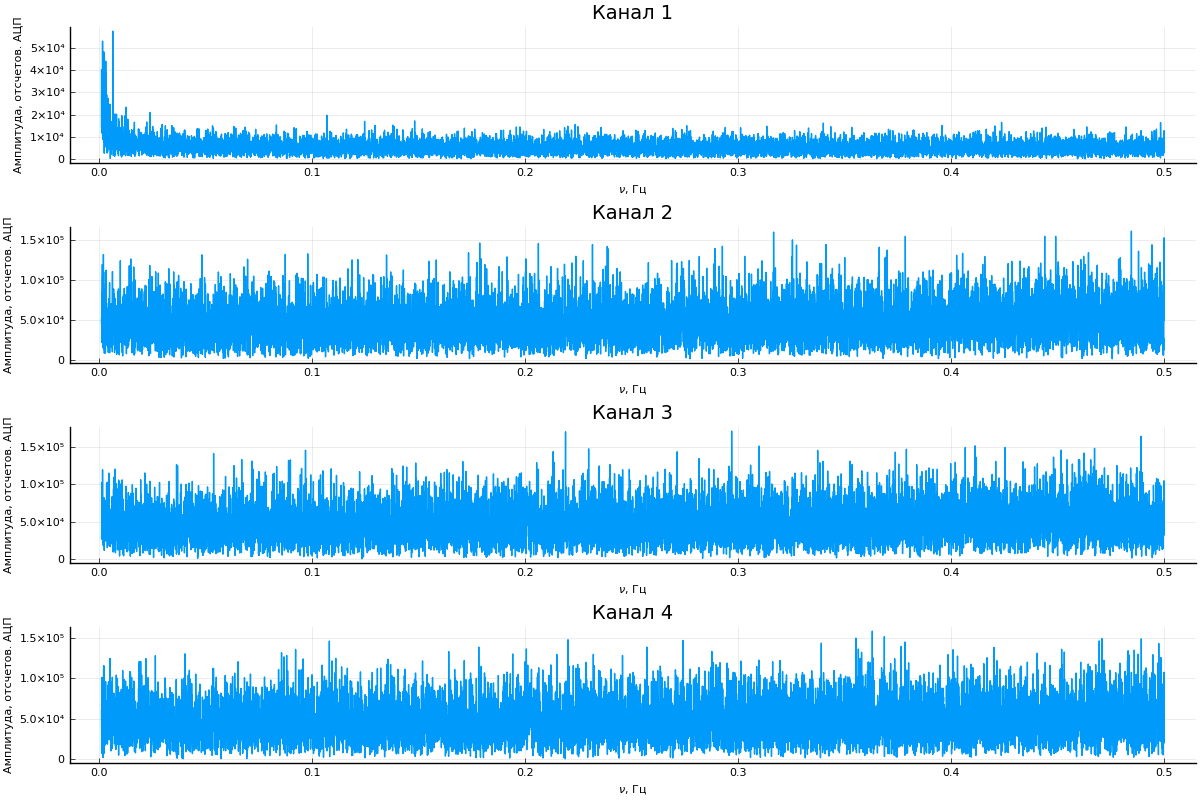

In [248]:
plt

# Плата №6
Исходный коэффециент усиления уменьшен в 2 раза, усреднение по 1 точке
файл AVG-by-1_DACOnUV-50_SN2_COM5_22.05.2020.LOG

In [249]:
S6_1_5, plt = getStatData("Exp02/AVG-by-1_DACOnUV-50_SN2_COM5_22.05.2020.LOG",workChanInd,18000:19000)
S6_1_5

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,59511.6,259.825,779.475,76.3484
2,59798.3,239.661,718.984,83.1705
3,64605.7,9.88386,29.6516,2178.83
4,64597.9,10.187,30.561,2113.74


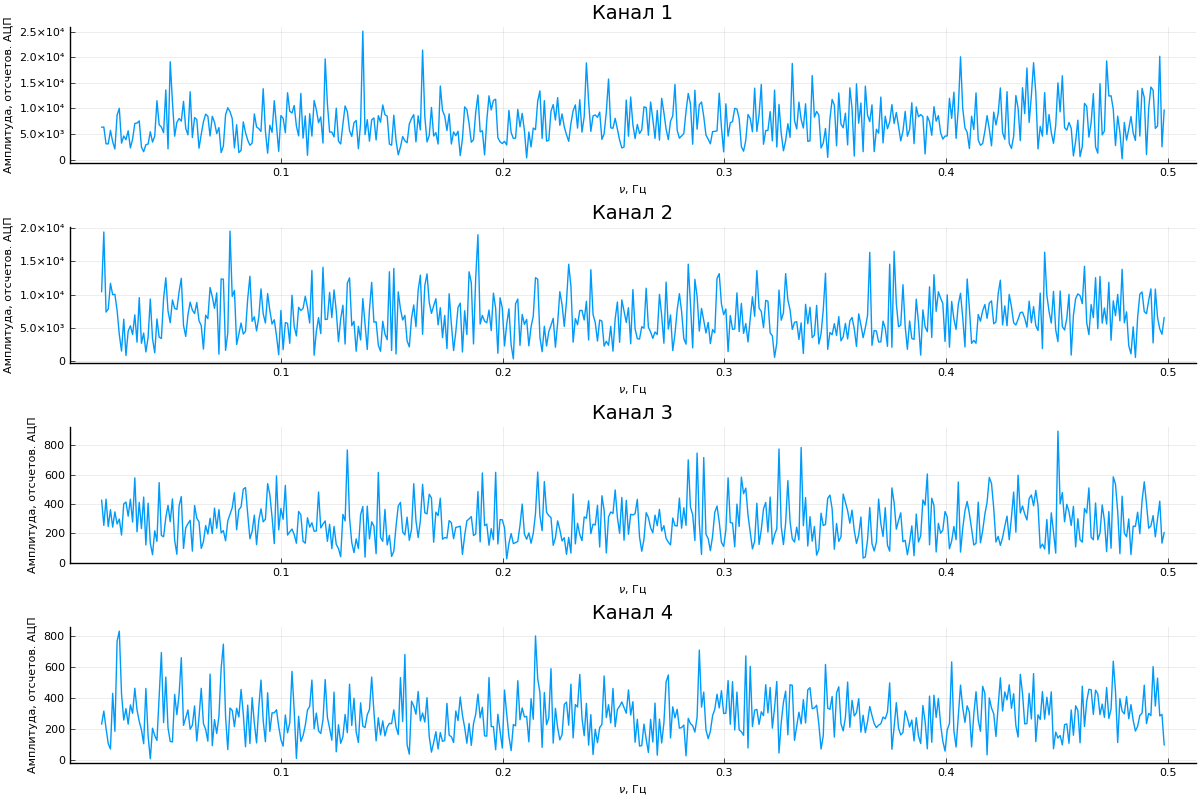

In [250]:
plt

# Плата №6
Исходный коэффециент усиления уменьшен в 2 раза, усреднение по 1 точке
файл AVG-by-1_DACOnUV-50_SN2_COM5_22.05.2020.LOG

In [226]:
S6_1_6,plt = getStatData("Exp02/AVG-by-100_DACOnUV-40_SN2_COM5_25.05.2020 (1).LOG",workChanInd,50000:100000)
S6_1_6

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,45200.7,60.7022,182.106,248.21
2,45539.8,60.4375,181.312,251.168
3,53440.8,67.4216,202.265,264.212
4,53423.0,64.1411,192.423,277.633


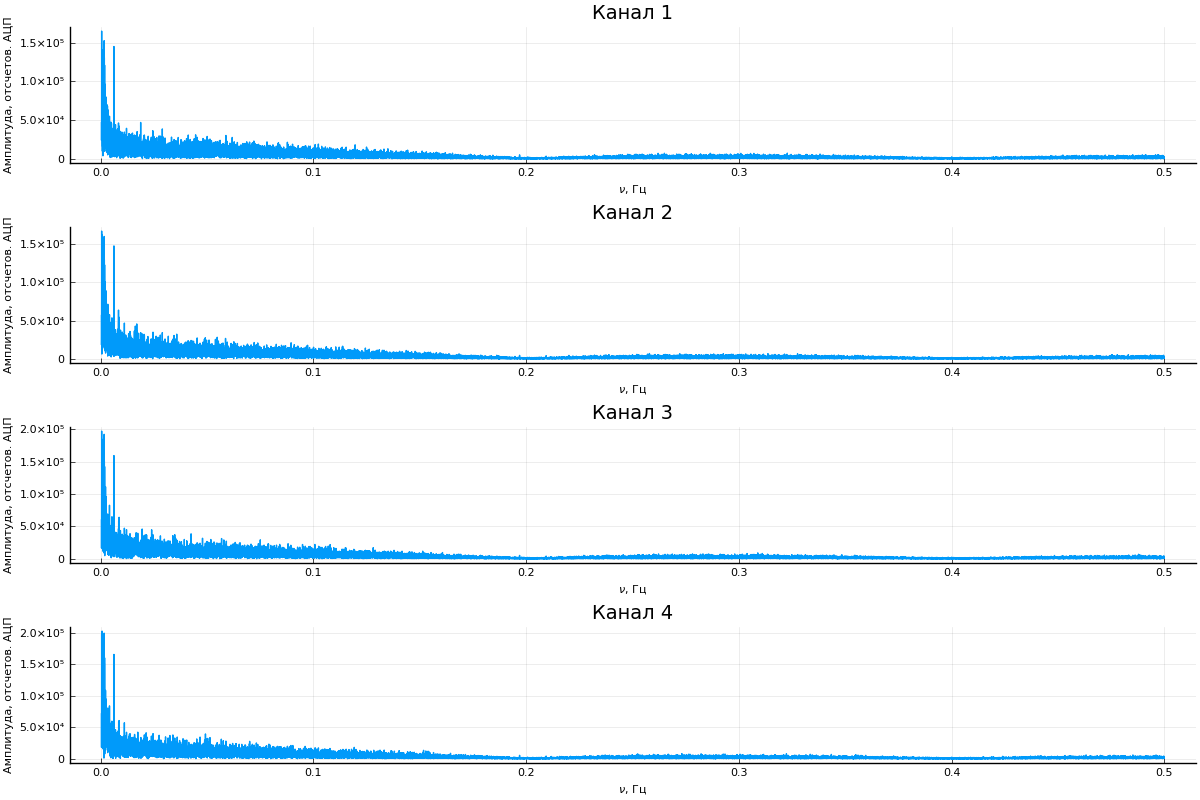

In [227]:
plt

# Плата №6
Исходный коэффециент усиления, усреднение по 1 точке, получены Ионовы Д.С.
файл oldN1b-25-1.LOG

In [228]:
S6_1_7,plt = getStatData("Exp00/oldN1b-25-1.LOG",workChanInd,1:400)
S6_1_7

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,49151.0,65.069,195.207,251.789
2,62805.0,66.5445,199.634,314.601
3,64616.3,8.73672,26.2102,2465.32
4,53920.5,68.871,206.613,260.973


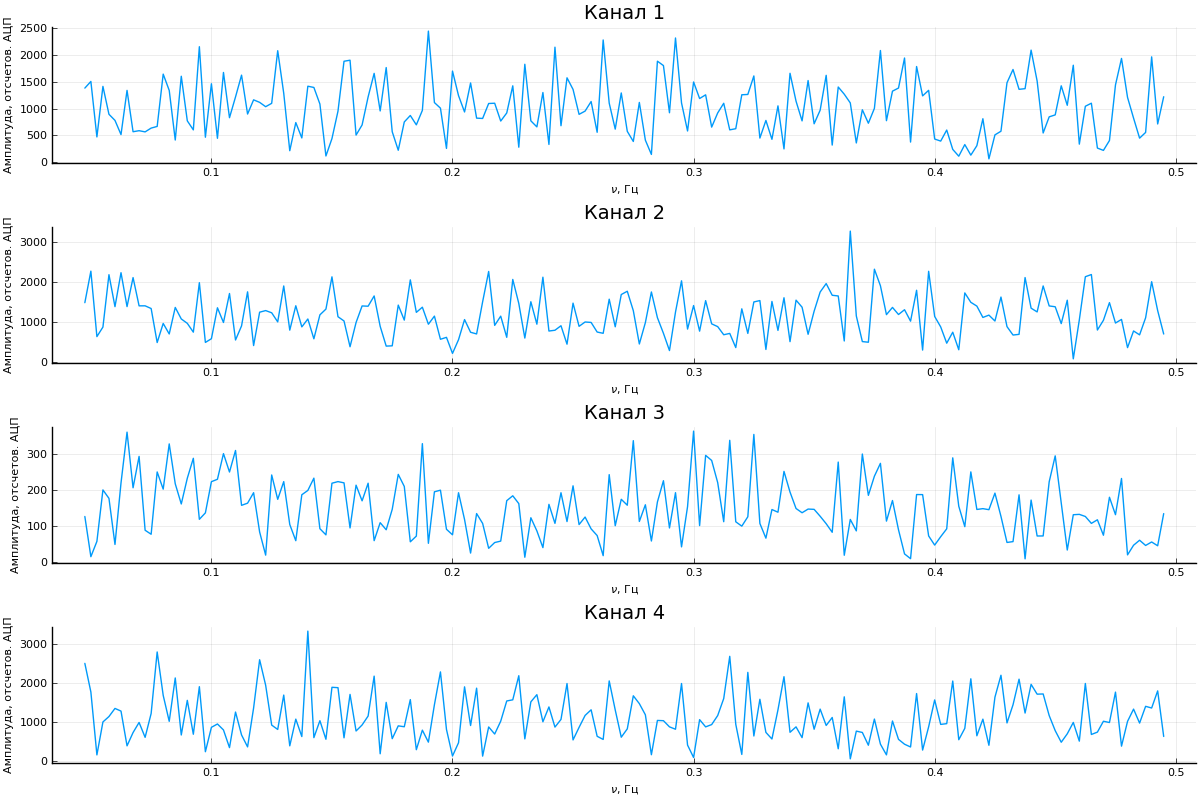

In [229]:
plt

# Плата №6
Исходный коэффециент усиления, усреднение по 100 точкам, получены Ионовы Д.С.
файл oldN100b-25-1.LOG

In [255]:
S6_1_8, plt = getStatData("Exp00/oldN100b-25-1.LOG",workChanInd,1:400)
S6_1_8

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,48924.0,42.625,127.875,382.592
2,62882.5,49.9426,149.828,419.698
3,64623.2,2.16621,6.49864,9944.12
4,54009.8,47.1853,141.556,381.543


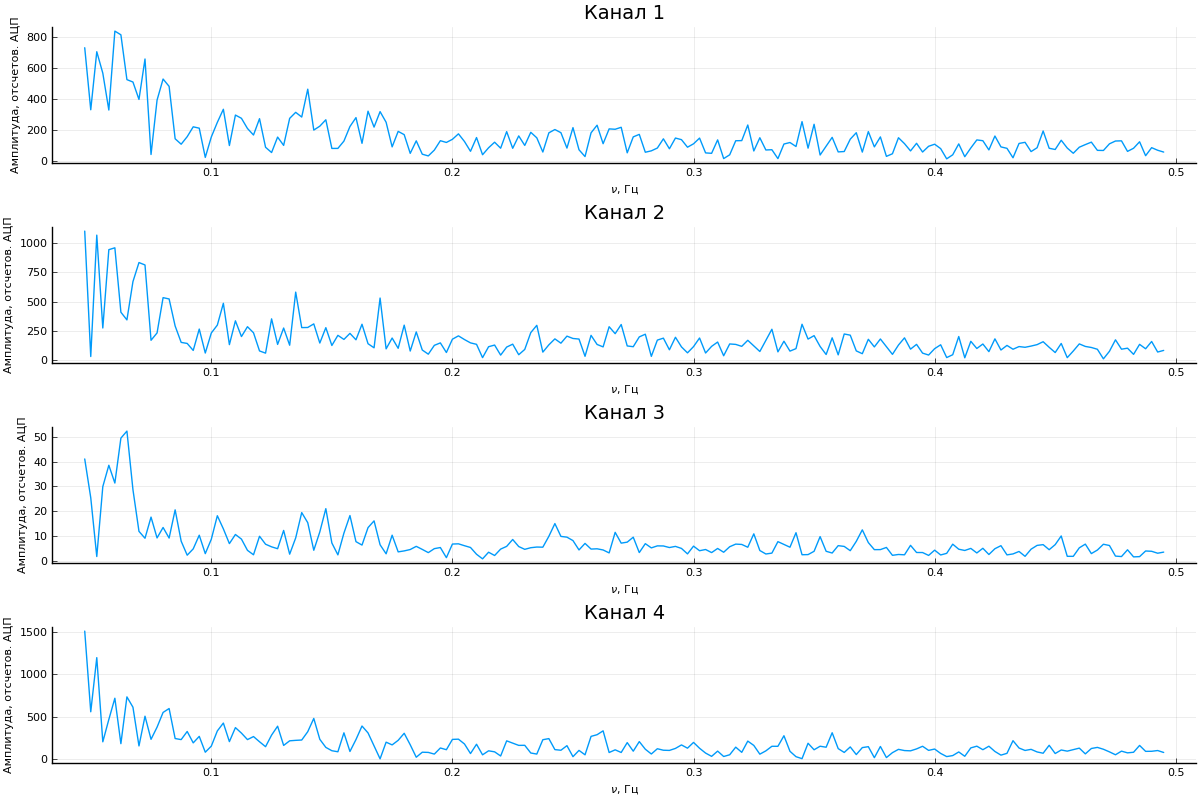

In [254]:
plt

# Плата №6
Исходный коэффециент усиления уменьшен в 5 раза, усреднение по 1 точке
файл AVG-by-1_CACOnUV-100_DACOnBL-28_SN2_COM5_07.06.2020.LOG

In [259]:
S4_1_2, plt = getStatData("Exp03/AVG-by-1_CACOnUV-100_DACOnBL-28_SN2_COM5_07.06.2020.LOG",workChanInd,5000:20000)
S4_1_2

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,60794.8,65.0265,195.08,311.641
2,60653.6,73.9044,221.713,273.568
3,51951.0,227.242,681.726,76.2052
4,52231.3,242.223,726.668,71.8778


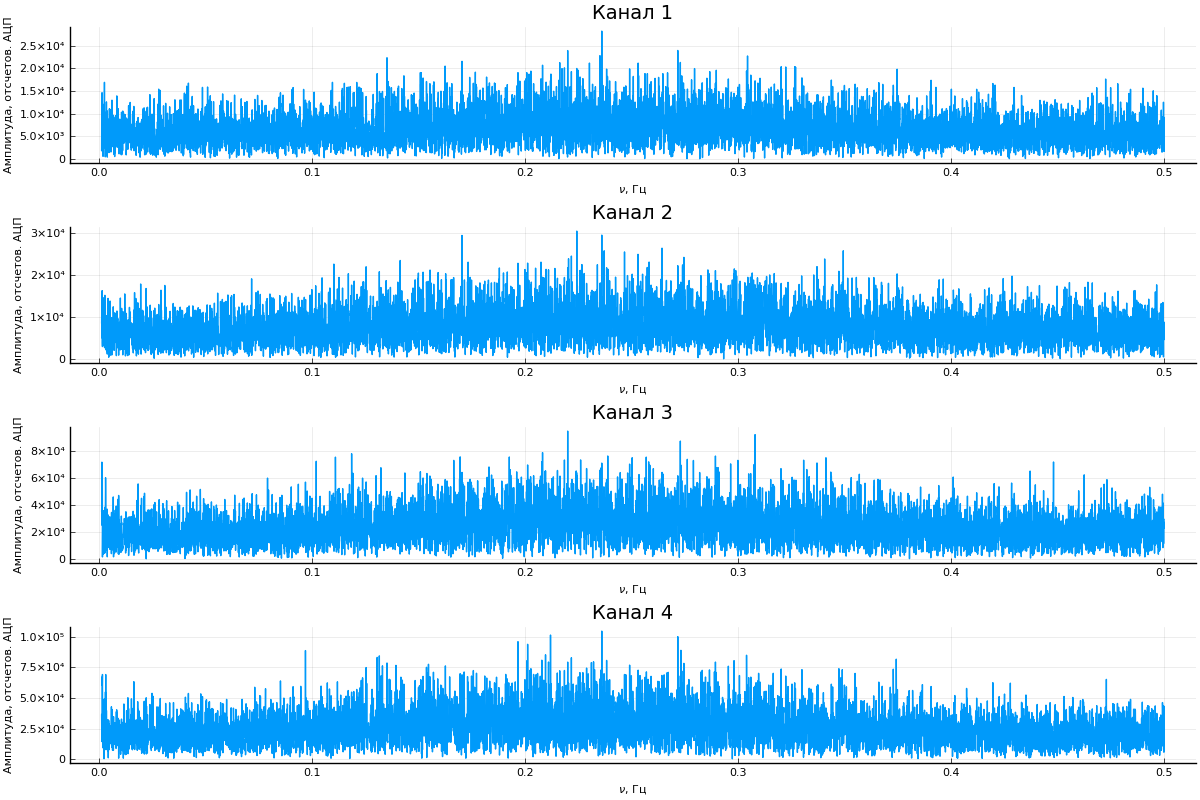

In [258]:
plt

# Плата №6
Исходный коэффециент усиления уменьшен в 5 раза, усреднение по 100 точкам
файл AVG-by-100_CACOnUV-100_DACOnBL-28_SN2_COM5_08.06.2020.LOG

In [263]:
S4_1_2, plt = getStatData("Exp03/AVG-by-100_CACOnUV-100_DACOnBL-28_SN2_COM5_08.06.2020.LOG",workChanInd,10000:20000)
S4_1_2

,$\bar{U}$,$\sigma_{U}$,$Err_{U}$,$SNR_{U}$
,Float64,Float64,Float64,Float64
1,60331.1,10.699,32.0971,1879.65
2,60623.5,11.3823,34.1468,1775.38
3,51779.8,21.9303,65.7908,787.037
4,52178.4,22.6646,67.9937,767.401


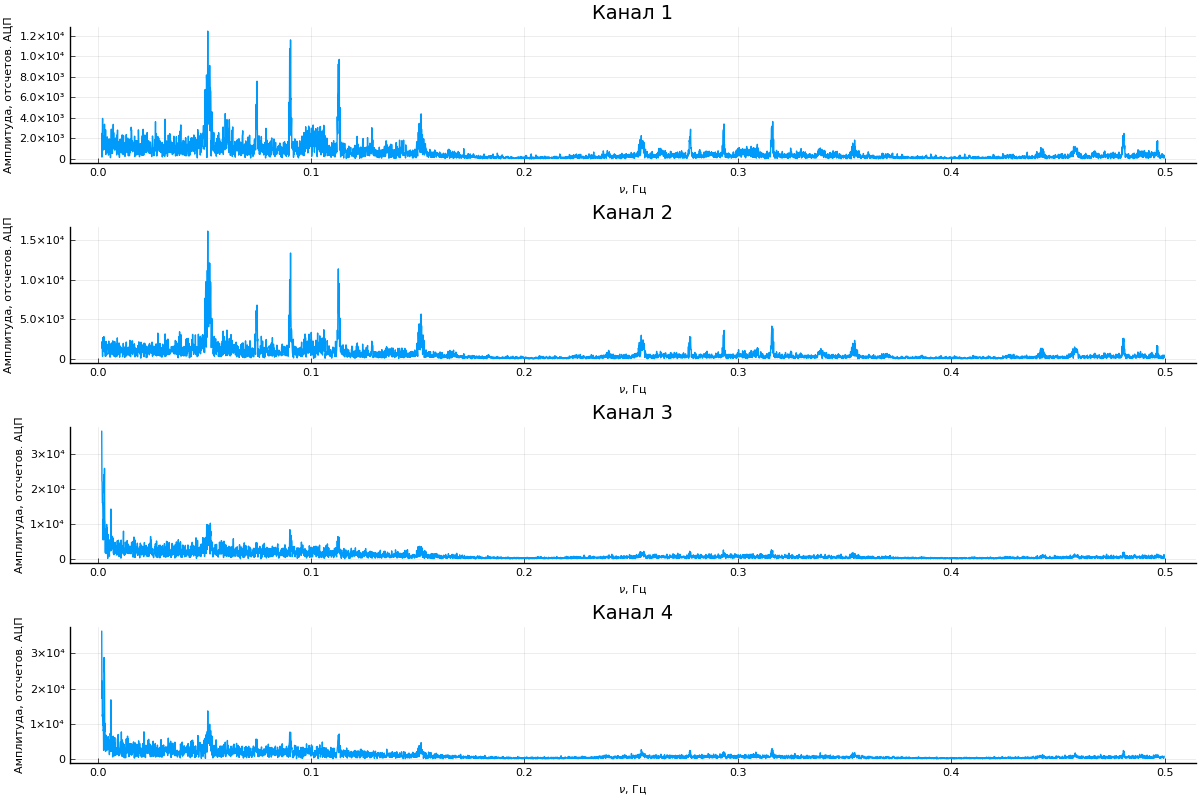

In [262]:
plt